### Background dist 

NOTE: This notebook must be placed in the `NGSIM-Data` folder which contains the `trajectories.csv` file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("NGSIM-Data/data.csv")

In [3]:
df.shape

(457997, 24)

In [4]:
df = df[df["Direction"] == 4]

In [ ]:
#df.shape

In [5]:
# filter out the cars entered from 114,113,215 on section 5
# df_south_start_14th = df[((df["Org_Zone"] == 114) | (df["Org_Zone"] == 113) | (df["Org_Zone"] == 215))& (df["Section"] == 5)]

# filter out the cars started on section 5
df_south_start_14th = df[df["Section"] == 5]

In [6]:
df_south_start_14th.shape

(21192, 24)

In [7]:
df_south_start_14th.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
8686,29,156,1144,1163045900,0.623,1936.173,2230810.364,1377396.167,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8687,29,157,1144,1163046000,0.249,1933.383,2230810.381,1377393.352,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8688,29,158,1144,1163046100,-0.112,1930.590,2230810.398,1377390.538,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8689,29,159,1144,1163046200,-0.395,1927.790,2230810.415,1377387.723,3.5,6.5,...,114,201,0,5,4,1,0,13,0.0,0.0
8690,29,160,1144,1163046300,-0.678,1924.989,2230810.432,1377384.909,3.5,6.5,...,114,201,0,5,4,1,0,0,0.0,0.0


In [8]:
df_south_start_14th['Vehicle_ID'].nunique()

207

In [9]:
# get the entering time or each car start on 14th street
epoch_min_per_vehicle_14 = df_south_start_14th.groupby('Vehicle_ID')["Epoch_ms"].min()
epoch_min_per_vehicle_14.head()

Vehicle_ID
29    1163045900
87    1163082900
88    1163083800
93    1163087000
94    1163089300
Name: Epoch_ms, dtype: int64

In [10]:
enter_times = epoch_min_per_vehicle_14.values
enter_times.sort()

In [11]:
difference = np.diff(enter_times)
difference = (difference / 1000)
difference = pd.Series(difference)
difference.head()

0    26.0
1     5.5
2     5.5
3     0.9
4     3.2
dtype: float64

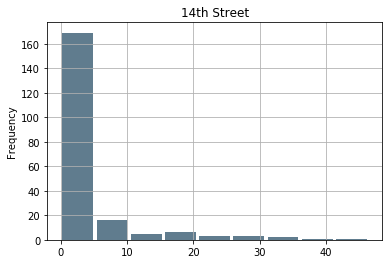

In [13]:
difference.plot.hist(grid=True, bins=9, rwidth=0.9, color='#607c8e',title='14th Street')

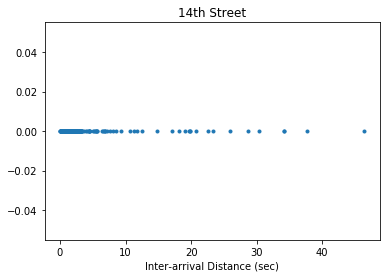

In [21]:
import matplotlib.pyplot as plot

d_14 = difference.values
plot.xlabel('Inter-arrival Distance (sec)')
plot.plot(d_14, np.zeros_like(d_14), '.')
plot.title('14th Street')
plot.show()

In [ ]:
# filter out the cars started on section 4 from 112
df_south_start_13th = df[(df["Org_Zone"] == 112) & (df["Section"] == 4)]
df_south_start_13th.shape

In [ ]:
df_south_start_13th['Vehicle_ID'].nunique()

Because the number of cars that enter from 13th street to Section 4 is only 2, we ignore the distribution of it.

In [ ]:
# filter out the cars started on section 3 from 121 and 106
df_south_start_12th = df[((df["Org_Zone"] == 121)|(df["Org_Zone"] == 106)) & (df["Section"] == 3)]
df_south_start_12th.shape

In [ ]:
df_south_start_12th['Vehicle_ID'].nunique()

The number of cars that enter from 12th street to Section 3 is 8, we can also ignore the distribution of it.

In [ ]:
# filter out the cars started on section 2 from 122
df_south_start_11th = df[((df["Org_Zone"] == 122) | (df["Org_Zone"] == 103)) & (df["Section"] == 2)]
df_south_start_11th.shape

In [ ]:
df_south_start_11th['Vehicle_ID'].nunique()

In [ ]:
# get the entering time or each car start on 12th street
epoch_min_per_vehicle_11 = df_south_start_11th.groupby('Vehicle_ID')["Epoch_ms"].min()

In [ ]:
enter_times = epoch_min_per_vehicle_11.values
enter_times.sort()
difference = np.diff(enter_times)
difference = (difference / 1000)
difference = pd.Series(difference)
difference.head()

In [ ]:
difference.plot.hist(grid=True, bins=9, rwidth=0.9, color='#607c8e',title='11th Street')

In [ ]:
d_11 = difference.values

plot.xlabel('Inter-arrival Distance (sec)')
plot.plot(d_11, np.zeros_like(d_11), '.')
plot.title('11th Street')
plot.show()

In [ ]:
d_11

### Calculate Avg Travel time between 14th and 10th

In [ ]:
df_south_pass_thru = df[(df["Org_Zone"] == 114) & (df["Dest_Zone"] == 201) ]

In [ ]:
total_frames_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Tot_Frames"].mean()

epoch_min_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Epoch_ms"].min()
epoch_max_per_vehicle = df_south_pass_thru.groupby('Vehicle_ID')["Epoch_ms"].max()

In [ ]:
av_time = total_frames_per_vehicle.mean() * .1

In [ ]:
av_time

In [ ]:
time_elapsed = (epoch_max_per_vehicle - epoch_min_per_vehicle).mean() / 1000

In [ ]:
time_elapsed

## Fit Gamma

In [ ]:
import scipy.stats as ss
import scipy as sp

d_14 = d_14[d_14 != 0]

split_14 = np.random.rand(len(d_14)) < 0.8
train_14 = d_14[split_14]
test_14 = d_14[~split_14]
# fit_alpha_14, fit_loc_14, fit_beta_14 = ss.gamma.fit(d_14)
# fit_alpha_14, fit_loc_14, fit_beta_14

In [ ]:
d_11 = d_11[d_11 != 0]
split_11 = np.random.rand(len(d_11)) < 0.8
train_11 = d_11[split_11]
test_11 = d_11[~split_11]
# fit_alpha_11, fit_loc_11, fit_beta_11 = ss.gamma.fit(d_11)
# fit_alpha_11, fit_loc_11, fit_beta_11

## Fit Dist

Try out gamma, exponential, normal, and lognorm dists

In [15]:
import fitdist
import importlib

In [ ]:
importlib.reload(fitdist)

In [16]:
dist_14 = fitdist.Distribution()

In [18]:
dist_14.Fit(d_14)

Trying  norm
D value for norm is 0.32682925807546404
Trying  lognorm
D value for lognorm is 0.1214681637654772
Trying  expon
D value for expon is 0.23681736963577926
Trying  gamma
D value for gamma is 0.21157447891396042
Resulting distributions:  [('norm', 4.273956390636756e-20), ('lognorm', 0.00416724236649675), ('expon', 1.1987310890946123e-10), ('gamma', 1.4342395325829276e-08)]


('lognorm', 0.00416724236649675)

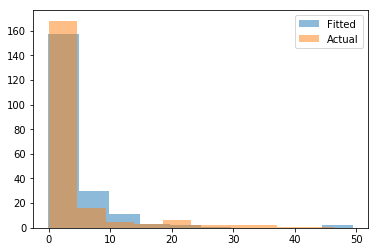

In [19]:
dist_14.Plot(d_14)

In [20]:
dist_14.getDist()

Dist:  <scipy.stats._continuous_distns.lognorm_gen object at 0x11e700ac8>
Param:  (1.123494632217069, -0.1308024415404237, 2.222162369513514)


### Histogram of 14th Entering: 

For fitted lognormal plot on the test dataset 

- shapes = 1.2046882723087768
- loc = -0.049603607783565
- scale = 2.204733890577165

In [ ]:
import matplotlib.pyplot as plt
fitted_14 =[]
for i in range(len(test_14)):
    r = dist_14.Random()
    fitted_14.append(r[0])
plt.hist(fitted_14, alpha=0.5, label='fitted')
plt.hist(test_14, alpha=0.5, label='actual')
plt.legend(loc='upper right')
plt.title('14th entering')

In [ ]:
dist_11 = fitdist.Distribution()

In [ ]:
dist_11.Fit(train_11)

In [ ]:
dist_11.getDist()

### Histogram of 11th Entering: 

For fitted lognormal plot with 
- shapes = 1.652463876573353
- loc = 2.047041934913354
- scale = 6.717587909256302

In [ ]:
import matplotlib.pyplot as plt
fitted_11 =[]
for i in range(len(test_11)):
    r = dist_11.Random()
    fitted_11.append(r[0])
plt.hist(fitted_11, alpha=0.5, label='fitted')
plt.hist(test_11, alpha=0.5, label='actual')
plt.legend(loc='upper right')
plt.title('11th entering')

In [ ]:
# Vechicle Generation on 14th
car_14=[0]
while True:  
    r = dist_14.Random()
    next_time = car_14[-1]+r[0]
    if next_time <= 900:
        car_14.append(next_time)
    else:
        break
print('num of cars generated:', len(car_14),'\n')
print(car_14)

Notes:
num of cars generated: 187 

[0, 0.9612642195386395, 3.539719238429014, 7.167948164111196, 8.241818096525687, 9.7487994663602, 11.22889925289062, 14.968568294508978, 16.721674363543947, 17.798668489069534, 18.051210608771395, 22.80043923946643, 31.599706546208385, 32.41808887717871, 32.73947393058564, 45.57812585122952, 47.001496394698556, 49.99219378168301, 55.3100745454171, 56.49275816612257, 57.92985722026359, 60.45240887062816, 67.26458122299742, 73.01251636632088, 76.00584480104754, 90.46646809978756, 94.74470499306642, 95.70882118603414, 98.9473158586248, 101.18138974396251, 104.97818607438077, 105.85148015362313, 107.59344938188863, 111.79977770894388, 112.6394578534942, 114.62618013446993, 115.7272521182604, 120.44483218433724, 123.08161842643281, 124.50022688211838, 128.68465395814798, 128.92742565690716, 132.84326845210373, 142.402637341194, 144.4615852577218, 145.3075648941485, 145.69156721976904, 149.07546527088488, 151.07074831445397, 152.11361056443852, 153.17789087840487, 154.62253810009614, 161.96097331102115, 174.104641089608, 175.45655579297252, 177.98335161770095, 184.21734068406752, 185.70366081661652, 187.39478231559008, 187.90775541368387, 191.72676222479708, 194.87021568386115, 195.3135679311817, 201.75283389963212, 202.4519147523345, 208.41102433337866, 209.15802053012456, 211.56586447548918, 213.0173924563301, 215.32766050638176, 216.28846696858997, 223.1668882135694, 224.44730560733296, 225.19721991300156, 228.50293704089972, 229.57347164696967, 231.00777892525366, 237.98269396578195, 243.83242510276875, 244.19027795734337, 245.04910369471654, 262.98623783046924, 267.1502106725117, 267.87020071581657, 268.0668100037627, 268.128404492543, 270.764971625543, 272.03519649255304, 272.55599473704024, 284.67678974672526, 286.4498022501065, 288.40490800950124, 289.658646736877, 295.3941311457821, 299.79381672083485, 310.54047286406893, 313.7946792795892, 314.0881331633305, 315.0035099792713, 315.435805821519, 317.7535449042472, 319.9184222265853, 323.8161357341109, 323.9938281190379, 331.43664967033385, 336.4809082341835, 337.4247282811788, 337.7834283953613, 338.73063741466535, 348.2216504074627, 351.9184600722713, 355.5414655492933, 362.4028580252602, 363.1779054833881, 369.1557683989894, 397.4733274417727, 405.4778582292446, 407.47188048028835, 410.5083746892327, 413.6872371372062, 416.945750105862, 426.7258598923838, 427.535307322885, 651.7873780986671, 656.0610850960628, 660.2266034392104, 661.0468396218841, 662.0810578679569, 663.9270432559543, 664.7697336013474, 673.277111585556, 676.2781307716724, 676.3466855051962, 677.244121152004, 679.0321283577288, 684.2912499815344, 694.7295781830709, 706.1681741670257, 708.6366790892596, 709.1053197091751, 710.4017941863409, 715.3030961405435, 724.60630800929, 726.1206863400483, 726.5103868737011, 730.4569975179464, 734.3290643788669, 737.3593703024602, 738.5430242084391, 739.5262664162889, 741.1144594988031, 767.0766537778055, 782.3116211074752, 782.3592773828508, 784.7186619698468, 794.3045438543967, 794.8191313938997, 807.0953543378081, 808.1555202801787, 810.2098594291887, 815.0458530587683, 815.4935451466023, 816.9448740374152, 817.1945026583852, 820.051954753229, 821.8524021719765, 822.3150082581706, 828.2339957850539, 832.063517934886, 833.5500290233729, 836.2888597459344, 856.9758680807727, 857.7773070928445, 858.2226542274849, 860.4767090202455, 866.0441467841035, 866.7185287412333, 867.5009350219284, 869.8563461645772, 871.8506789220432, 872.9577596715187, 874.4444330435845, 885.3090512281357, 885.4990627706198, 890.2235172471808, 891.5323326245687, 899.0273368870149]

In [ ]:
# Vechicle Generation on 11th
car_11=[0]
while True:  
    r = dist_11.Random()
    next_time = car_11[-1]+r[0]
    if next_time <= 900:
        car_11.append(next_time)
    else:
        break
print('num of cars generated:', len(car_11),'\n')
print(car_11)

Notes: 
num of cars generated: 58 

[0, 3.7959771179601494, 7.936542246743041, 9.939470621096163, 17.179356137931862, 34.88519448102765, 66.41297690137812, 69.45131321240557, 124.5821420263522, 128.2762847901585, 150.74981582049378, 153.45430720798257, 159.51703903346737, 161.9333278421486, 164.1199439676425, 168.79218976300783, 265.29834133181356, 274.0574103506962, 282.82562468338745, 300.06328942980855, 304.7460940882334, 328.6180662886842, 333.63360921508865, 336.33702260467754, 338.63079260872945, 350.75644093679335, 354.77110424978076, 398.39648369204235, 402.5982601570797, 405.3803176798654, 410.40229227234363, 413.1254693933155, 455.2913900300041, 483.995225242003, 492.6831291814365, 515.71223012558, 520.6145073019777, 527.3274780403895, 539.5743764086113, 552.5882446638902, 556.993989581168, 561.3834153942814, 578.0536538341529, 586.9245821284436, 634.6498456048226, 638.2328549400522, 641.473531608176, 651.7387387339955, 702.8537303142238, 705.2990250844093, 710.5393705204228, 723.1451592305568, 728.8079778130246, 789.7397769572494, 793.2099090769509, 844.955314881151, 850.0482775473859, 872.1860039319564]

## Traffic Lights Timing

We only consider the traffic lights in the intersections of 11th, 12th and the Peachtree
The yellow and red lights are combined as red for simplification.
Assume the traffic lights always start with green lights at timestamp 0.

11th and Peachtree
Green Yellow Red
41.5 3.2 55.4

Green Red
41.5 58.6


12th and Peachtree
Green Yellow Red
61.4 3.2 35.7

Green Red
61.4 37.9

In [ ]:
# 11th and Peachtree
green_11 = [0]
red_11 = []
all_11 = [0]

while True:
    next_red = green_11[-1] + 41.5
    next_green = next_red + 58.6
    if (next_red <= 900) & (next_green <= 900):
        red_11.append(next_red)
        green_11.append(next_green)
        all_11.append(next_red)
        all_11.append(next_green)
    else:
        break

print('green light starts',green_11)
print('red light starts',red_11)
print('traffic lights changing point',all_11)

In [ ]:
# 12th and Peachtree
green_12 = [0]
red_12 = []
all_12 = [0]

while True:
    next_red = green_12[-1] + 61.4
    next_green = next_red + 37.9
    if (next_red <= 900) & (next_green <= 900):
        red_12.append(next_red)
        green_12.append(next_green)
        all_12.append(next_red)
        all_12.append(next_green)
    else:
        break

print('green light starts',green_12)
print('red light starts',red_12)
print('traffic lights changing point',all_12)